In [1]:
pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns 

df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df = df.round(1)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,17.0,1.0,Female,No,Sun,Dinner,2
1,10.3,1.7,Male,No,Sun,Dinner,3
2,21.0,3.5,Male,No,Sun,Dinner,3
3,23.7,3.3,Male,No,Sun,Dinner,2
4,24.6,3.6,Female,No,Sun,Dinner,4


In [4]:
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].round(1)
    
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,17.0,1.0,Female,No,Sun,Dinner,2
1,10.3,1.7,Male,No,Sun,Dinner,3
2,21.0,3.5,Male,No,Sun,Dinner,3
3,23.7,3.3,Male,No,Sun,Dinner,2
4,24.6,3.6,Female,No,Sun,Dinner,4


In [5]:
df = sns.load_dataset('tips')
df[['total_bill', 'tip']] = df[['total_bill', 'tip']].round(2)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df['total_bill'].fillna(df['total_bill'].mean().round(2))

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [7]:
# regresión lineal simple aplicada a salarios
df = pd.read_csv('../../data/salaries_experience.csv')
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<Axes: xlabel='YearsExperience', ylabel='Salary'>

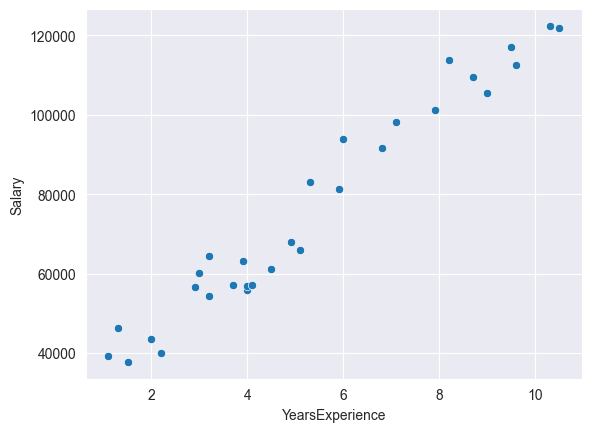

In [8]:
sns.scatterplot(df, x='YearsExperience', y='Salary')

In [9]:
# Regresión lineal simple
# X entrada (1 columna YearsExperience)
# y salida (Salary)
from sklearn.linear_model import LinearRegression

X = df[['YearsExperience']] # dataframe de dos dimensiones
y = df['Salary'] # Variable a predecir

model = LinearRegression()

model.fit(X, y)

# el punto en el eje vertical y donde la recta cruza cuando x = 0
print('Intercepto (w0 / b0): ', model.intercept_)
# tasa de cambio de y por cada unidad de cambio en x: por cada año de experiencia el salario aumenta en 9449 €
print('Coeficiente (w1 / b1):', model.coef_)

Intercepto (w0 / b0):  25792.20019866871
Coeficiente (w1 / b1): [9449.96232146]


In [10]:
X_new = pd.DataFrame([1.44, 6.34, 9.5], columns=['YearsExperience'])
# model.predict([[6.34]])
model.predict(X_new)

array([ 39400.14594156,  85704.96131669, 115566.84225249])

In [11]:
# lo habitual para testear el modelo es usar nuevos datos en la X o haber particionado en entrenamiento y test
y_pred = model.predict(X)

In [12]:
# métricas de scikit de regresión
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

# calidad global: qué tan bien el modelo explica la variabilidad de los datos
# Representa la proporción de varianza total en la variable dependiente que es explicada por el modelo
# Cuanto más cercano a 1 mejor
# Cuanto más cercano a 0 peor
r2 = r2_score(y, y_pred)
print('r2:', r2)

# Cuanto más cercano a 0 mejor. La interpetramos en la escala de la variable que predecimos
# Salario que el modelo se equivoca, por ejmplo 4644 € de error
mae = mean_absolute_error(y, y_pred)
print('mae:', mae)

mape = mean_absolute_percentage_error(y, y_pred)
print('mape:', mape) # 7,04 % de error al calcular el salario 

# penaliza predicciones malas o alejadas del valor real. 5592 € de error de salario
rmse = root_mean_squared_error(y, y_pred)
print('rmse:', rmse)

r2: 0.9569566641435086
mae: 4644.2012894435375
mape: 0.07048034398306607
rmse: 5592.043608760662


In [13]:
# particionamiento en datos para entrenamiento y datos para test: 80/20, 70/30, 90/10

# particionamiento y validación cruzada

In [14]:
# Regresión lineal múltiple
# X entrada (Más de una columna)
# y salida (Salary)